In [99]:

import numpy as np

import os

import numpy as np

import matplotlib.pyplot as plt

import plotly.graph_objects as go

import gzip
import pickle as pkl

def loadall_results(path, horizon, n_folds):
    unpickled_objects = []
    with gzip.open(  path ,'rb') as file:
        while True:
            try:
                # Unpickle the next object in the file
                obj = pkl.load(file)
                unpickled_objects.append(obj)
            except EOFError:
                # End of file reached
                break
    result = np.array(unpickled_objects) #.reshape( (n_folds, horizon) )
    result = np.delete(result, 0, axis=0)
    return result

game = 'AT'
horizon = 2500
n_folds = 8
direct = './results/{}/'.format(game)
task = 'imbalanced'
context_type = 'linear'

# approach =  'neuralcbp_1' 
approach = 'neuralcbp_simplified'  
# approach = 'cbpside_theory'

path = os.path.join(direct, 'benchmark_{}_{}_{}_{}_{}.pkl.gz'.format(task, context_type,horizon,n_folds,approach) )
res = loadall_results(path, horizon, n_folds)



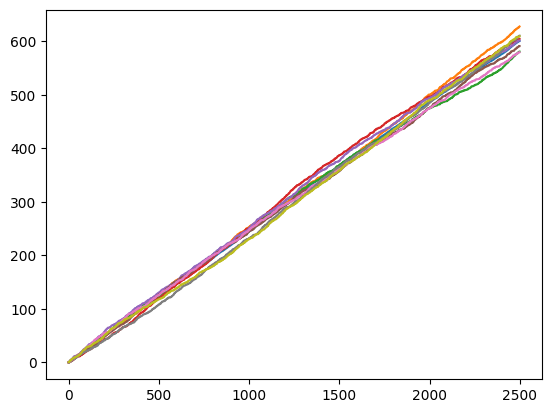

In [100]:
plt.plot(range(horizon), np.mean(res,0))

for i in res:
    plt.plot( range(horizon), i )

plt.savefig('./{}.png'.format(approach) )